# Predicting Car Prices

I explored the fundamentals of machine learning using the k-nearest neighbors algorithm. In this project, I'll practice the machine learning workflow you've learned so far to predict a car's market price using its attributes. 

The data set I'll be working with contains information on various cars. For each car there are information about the technical aspects of the vehicle such as the motor's displacement, the weight of the car, the miles per gallon, how fast the car accelerates, and more.

## Reading the data

In [1]:
import pandas as pd
columns=[
    "symboling",
    "normalized_losses",
    "make",
    "fuel_type",
    "aspiration",
    "num_doors",
    "body_style",
    "drive_wheels",
    "engine_location",
    "wheel_base",
    "length",
    "width",
    "height",
    "curb_weight",
    "engine_type",
    "num_cylinders",
    "engine_size",
    "fuel_system",
    "bore",
    "stroke",
    "compression_ratio",
    "horsepower",
    "peak_rpm",
    "city_mpg",
    "highway_mpg",
    "price"
]
cars=pd.read_csv("imports-85.data", names=columns)
print(cars.head())

   symboling normalized_losses         make fuel_type aspiration num_doors  \
0          3                 ?  alfa-romero       gas        std       two   
1          3                 ?  alfa-romero       gas        std       two   
2          1                 ?  alfa-romero       gas        std       two   
3          2               164         audi       gas        std      four   
4          2               164         audi       gas        std      four   

    body_style drive_wheels engine_location  wheel_base  ...    engine_size  \
0  convertible          rwd           front        88.6  ...            130   
1  convertible          rwd           front        88.6  ...            130   
2    hatchback          rwd           front        94.5  ...            152   
3        sedan          fwd           front        99.8  ...            109   
4        sedan          4wd           front        99.4  ...            136   

   fuel_system  bore  stroke compression_ratio horsepowe

In [2]:
print(cars.dtypes)

symboling              int64
normalized_losses     object
make                  object
fuel_type             object
aspiration            object
num_doors             object
body_style            object
drive_wheels          object
engine_location       object
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight            int64
engine_type           object
num_cylinders         object
engine_size            int64
fuel_system           object
bore                  object
stroke                object
compression_ratio    float64
horsepower            object
peak_rpm              object
city_mpg               int64
highway_mpg            int64
price                 object
dtype: object


In [3]:
# Select only the columns with continuous values from - https://archive.ics.uci.edu/ml/machine-learning-databases/autos/imports-85.names
continuous_values_cols = ['normalized_losses', 'wheel_base', 'length', 'width', 'height', 'curb_weight', 'engine_size', 'bore', 'stroke', 'compression_ratio', 'horsepower', 'peak_rpm', 'city_mpg', 'highway_mpg', 'price']
numeric_cars = cars[continuous_values_cols]

The target column is obviously "__price__".

## Data Cleaning

You usually can't have any missing values if ypu want to use them for predictive modeling. Based on the data set preview from the last step, it's clear that the normalized-losses column contains missing values represented using "?". 

- Let's replace these values and look for the presence of missing values in other numeric columns. 
- Let's also rescale the values in the numeric columns so they all range from 0 to 1.

In [4]:
import numpy as np
numeric_cars=numeric_cars.replace("?", np.nan)
print(numeric_cars.head())
print(numeric_cars.dtypes)

  normalized_losses  wheel_base  length  width  height  curb_weight  \
0               NaN        88.6   168.8   64.1    48.8         2548   
1               NaN        88.6   168.8   64.1    48.8         2548   
2               NaN        94.5   171.2   65.5    52.4         2823   
3               164        99.8   176.6   66.2    54.3         2337   
4               164        99.4   176.6   66.4    54.3         2824   

   engine_size  bore stroke  compression_ratio horsepower peak_rpm  city_mpg  \
0          130  3.47   2.68                9.0        111     5000        21   
1          130  3.47   2.68                9.0        111     5000        21   
2          152  2.68   3.47                9.0        154     5000        19   
3          109  3.19   3.40               10.0        102     5500        24   
4          136  3.19   3.40                8.0        115     5500        18   

   highway_mpg  price  
0           27  13495  
1           27  16500  
2           26  1650

In [5]:
numeric_cars = numeric_cars.astype('float')
print(numeric_cars.dtypes)
print(numeric_cars.isnull().sum())

normalized_losses    float64
wheel_base           float64
length               float64
width                float64
height               float64
curb_weight          float64
engine_size          float64
bore                 float64
stroke               float64
compression_ratio    float64
horsepower           float64
peak_rpm             float64
city_mpg             float64
highway_mpg          float64
price                float64
dtype: object
normalized_losses    41
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 4
dtype: int64


In [6]:
print(numeric_cars.shape)

(205, 15)


In [7]:
numeric_cars = numeric_cars.dropna(subset=['price'])
print(numeric_cars.isnull().sum())

normalized_losses    37
wheel_base            0
length                0
width                 0
height                0
curb_weight           0
engine_size           0
bore                  4
stroke                4
compression_ratio     0
horsepower            2
peak_rpm              2
city_mpg              0
highway_mpg           0
price                 0
dtype: int64


In [8]:
problematic_rows=numeric_cars[numeric_cars["bore"].isnull()]
print(problematic_rows)

    normalized_losses  wheel_base  length  width  height  curb_weight  \
55              150.0        95.3   169.0   65.7    49.6       2380.0   
56              150.0        95.3   169.0   65.7    49.6       2380.0   
57              150.0        95.3   169.0   65.7    49.6       2385.0   
58              150.0        95.3   169.0   65.7    49.6       2500.0   

    engine_size  bore  stroke  compression_ratio  horsepower  peak_rpm  \
55         70.0   NaN     NaN                9.4       101.0    6000.0   
56         70.0   NaN     NaN                9.4       101.0    6000.0   
57         70.0   NaN     NaN                9.4       101.0    6000.0   
58         80.0   NaN     NaN                9.4       135.0    6000.0   

    city_mpg  highway_mpg    price  
55      17.0         23.0  10945.0  
56      17.0         23.0  11845.0  
57      17.0         23.0  13645.0  
58      16.0         23.0  15645.0  


In [9]:
problematic_rows_2=numeric_cars[numeric_cars["horsepower"].isnull()]
print(problematic_rows_2)

     normalized_losses  wheel_base  length  width  height  curb_weight  \
130                NaN        96.1   181.5   66.5    55.2       2579.0   
131                NaN        96.1   176.8   66.6    50.5       2460.0   

     engine_size  bore  stroke  compression_ratio  horsepower  peak_rpm  \
130        132.0  3.46     3.9                8.7         NaN       NaN   
131        132.0  3.46     3.9                8.7         NaN       NaN   

     city_mpg  highway_mpg   price  
130      23.0         31.0  9295.0  
131      23.0         31.0  9895.0  


In [10]:
numeric_cars = numeric_cars.fillna(numeric_cars.mean())
print(numeric_cars.iloc[126:128])

     normalized_losses  wheel_base  length  width  height  curb_weight  \
130              122.0        96.1   181.5   66.5    55.2       2579.0   
131              122.0        96.1   176.8   66.6    50.5       2460.0   

     engine_size  bore  stroke  compression_ratio  horsepower    peak_rpm  \
130        132.0  3.46     3.9                8.7  103.396985  5117.58794   
131        132.0  3.46     3.9                8.7  103.396985  5117.58794   

     city_mpg  highway_mpg   price  
130      23.0         31.0  9295.0  
131      23.0         31.0  9895.0  


In [11]:
target=numeric_cars["price"]
numeric_cars=(numeric_cars-numeric_cars.min())/(numeric_cars.max()-numeric_cars.min())
numeric_cars["price"]=target
numeric_cars.describe()

,normalized_losses,wheel_base,length,width,height,curb_weight,engine_size,bore,stroke,compression_ratio,horsepower,peak_rpm,city_mpg,highway_mpg,price
count,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000,201.000000
mean,0.298429,0.355598,0.494045,0.477697,0.497222,0.414145,0.248587,0.564793,0.565192,0.197767,0.258864,0.394934,0.338308,0.386489,13207.129353
std,0.167520,0.176862,0.183913,0.179613,0.203985,0.200658,0.156781,0.191480,0.150499,0.250310,0.174606,0.195148,0.178423,0.179346,7947.066342
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,5118.000000
25%,0.188482,0.230321,0.383582,0.324786,0.350000,0.264158,0.139623,0.435714,0.495238,0.100000,0.102804,0.265306,0.166667,0.236842,7775.000000
50%,0.298429,0.303207,0.479104,0.444444,0.525000,0.359193,0.222642,0.550000,0.580952,0.125000,0.219626,0.394934,0.305556,0.368421,10295.000000
75%,0.376963,0.460641,0.632836,0.538462,0.641667,0.557797,0.301887,0.742857,0.638095,0.150000,0.317757,0.551020,0.472222,0.473684,16500.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45400.000000


In [12]:
print(numeric_cars.isnull().sum())

normalized_losses    0
wheel_base           0
length               0
width                0
height               0
curb_weight          0
engine_size          0
bore                 0
stroke               0
compression_ratio    0
horsepower           0
peak_rpm             0
city_mpg             0
highway_mpg          0
price                0
dtype: int64


In [13]:
numeric_cars=numeric_cars.reset_index(drop=True)
print(numeric_cars.index)
print(numeric_cars)

RangeIndex(start=0, stop=201, step=1)
     normalized_losses  wheel_base    length     width    height  curb_weight  \
0             0.298429    0.058309  0.413433  0.324786  0.083333     0.411171   
1             0.298429    0.058309  0.413433  0.324786  0.083333     0.411171   
2             0.298429    0.230321  0.449254  0.444444  0.383333     0.517843   
3             0.518325    0.384840  0.529851  0.504274  0.541667     0.329325   
4             0.518325    0.373178  0.529851  0.521368  0.541667     0.518231   
5             0.298429    0.384840  0.540299  0.512821  0.441667     0.395268   
6             0.486911    0.559767  0.770149  0.948718  0.658333     0.525989   
7             0.298429    0.559767  0.770149  0.948718  0.658333     0.568658   
8             0.486911    0.559767  0.770149  0.948718  0.675000     0.619860   
9             0.664921    0.425656  0.532836  0.384615  0.541667     0.351823   
10            0.664921    0.425656  0.532836  0.384615  0.541667     0.

## Univariate Model

Let's start with some univariate k-nearest neighbors models. Starting with simple models before moving to more complex models helps to structure the code workflow and understand the features better.

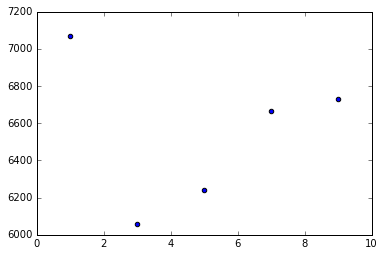

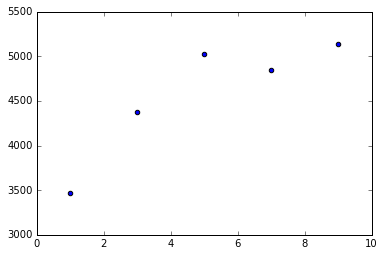

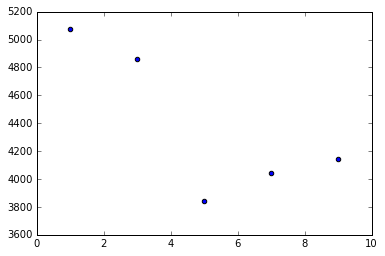

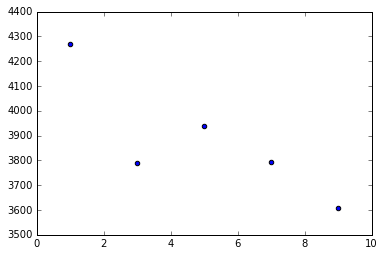

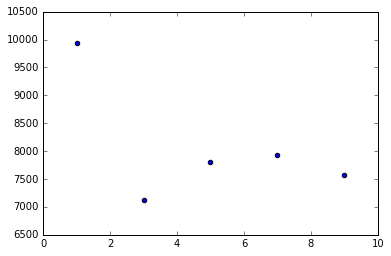

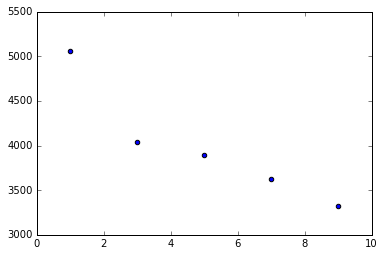

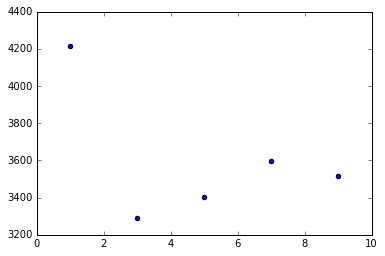

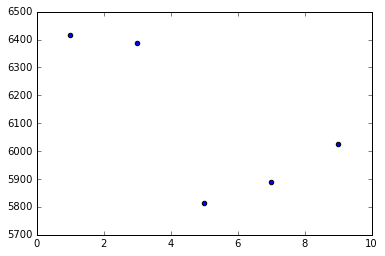

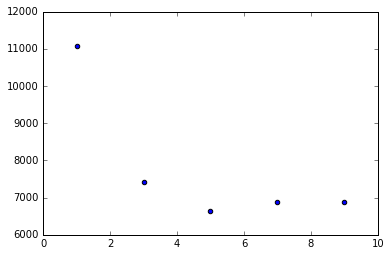

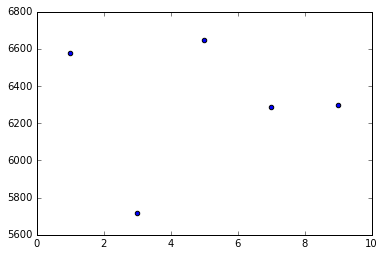

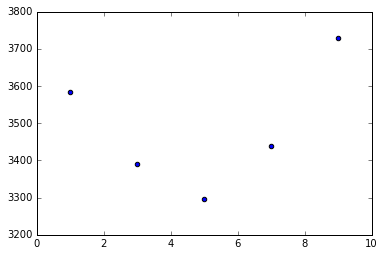

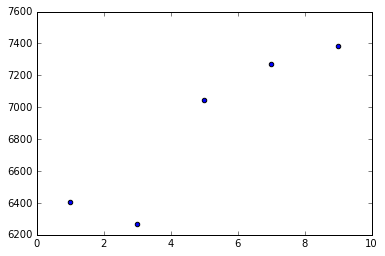

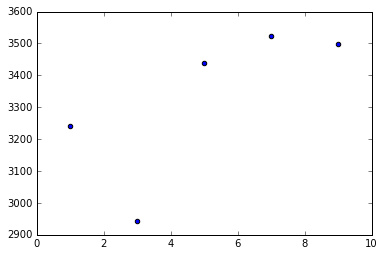

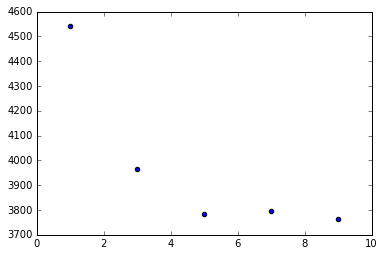

normalized_losses    6551.751599
wheel_base           4571.204970
length               4392.908467
width                3878.867200
height               8072.135940
curb_weight          3986.108678
engine_size          3603.651751
bore                 6106.062419
stroke               7783.638833
compression_ratio    6305.457716
horsepower           3487.980339
peak_rpm             6876.584697
city_mpg             3329.047336
highway_mpg          3969.742138
Name: Rmse_vs_feature, dtype: float64


In [14]:
from sklearn.neighbors import KNeighborsRegressor
from sklearn.metrics import mean_squared_error
import matplotlib.pyplot as plt
%matplotlib inline

def knn_train_test(training_name, target_name, df, k):
    np.random.seed(1)
    shuffled_index=np.random.permutation(range(len(df)))
    rand_df = df.reindex(shuffled_index)
    len_test=len(rand_df)//4
    test_df=rand_df.iloc[:len_test]
    train_df=rand_df.iloc[len_test:]
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[[training_name]], train_df[target_name])
    predictions = knn.predict(test_df[[training_name]])
    mse=mean_squared_error(test_df[target_name], predictions)
    rmse=mse**(1/2)
    return rmse

features=numeric_cars.columns.drop("price").tolist()
k_vals=[1,3,5,7,9]
ave_rmses=[]
for col in features:
    rmse_list=[]
    for k in k_vals:
        rmse=knn_train_test(col, "price", numeric_cars, k)
        rmse_list.append(rmse)
    rmse_ser=pd.Series(rmse_list, index=k_vals, name=col)
    ave_rmses.append(rmse_ser.mean())
    plt.scatter(rmse_ser.index, rmse_ser)
    plt.show()
ave_rmses_ser=pd.Series(ave_rmses, index=features, name="Rmse_vs_feature")
print(ave_rmses_ser)

In [15]:
ave_rmses_ser=ave_rmses_ser.sort_values()
print(ave_rmses_ser)

city_mpg             3329.047336
horsepower           3487.980339
engine_size          3603.651751
width                3878.867200
highway_mpg          3969.742138
curb_weight          3986.108678
length               4392.908467
wheel_base           4571.204970
bore                 6106.062419
compression_ratio    6305.457716
normalized_losses    6551.751599
peak_rpm             6876.584697
stroke               7783.638833
height               8072.135940
Name: Rmse_vs_feature, dtype: float64


## Multivariate Model

Now that I obtained a "ranking" of the most suitable features, let's modify the knn_train_test() function we wrote in the last step to work with multiple columns.

In [16]:
def knn_train_test_mult_cols(training_list, target_name, df):
    np.random.seed(1)
    shuffled_index=np.random.permutation(range(len(df)))
    rand_df = df.reindex(shuffled_index)
    len_test=len(rand_df)//4
    test_df=rand_df.iloc[:len_test]
    train_df=rand_df.iloc[len_test:]
    knn = KNeighborsRegressor()
    knn.fit(train_df[training_list], train_df[target_name])
    predictions = knn.predict(test_df[training_list])
    mse=mean_squared_error(test_df[target_name], predictions)
    rmse=mse**(1/2)
    return rmse

ordered_features=ave_rmses_ser.index.tolist()
n_features=[2,3,4,5]
new_rmse_list=[]
for n in n_features:
    training_list=ordered_features[:n]
    new_rmse=knn_train_test_mult_cols(training_list, "price", numeric_cars)
    new_rmse_list.append(new_rmse)
new_rmse_ser=pd.Series(new_rmse_list, index=n_features, name="New_rmse_ser")
print(new_rmse_ser)

2    3811.869648
3    2948.107388
4    2686.118992
5    2697.373137
Name: New_rmse_ser, dtype: float64


## Hyperparameter Tuning

Based on the previous step, it seems the best features to exploit are the first four columns of the ranking, but the model is not optimized yet.

3   [3432.512691892049, 2918.318900497339, 2607.745215485763, 2782.9823002940566, 2948.107387867681, 2929.747579570636, 2968.326836685569, 3005.5690128909037, 3034.8034361876385, 2992.431686137547, 3124.329434805184, 3165.430816058061, 3304.855856867975, 3460.794378801916, 3575.0638417050213, 3665.853428730819, 3780.7933689302185, 3886.6602292208936, 4013.0566572217767, 4071.872814381608, 4143.059673845295, 4209.482384612583, 4272.861790469437, 4328.02612911138, 4395.769828769473]
4   [3117.2436799198103, 2281.527906908, 2245.496537516814, 2449.687857156499, 2686.11899215206, 2758.5200921669734, 2715.8372046278505, 2772.4909714686178, 2791.547826945377, 2827.884501707946, 2902.4422576242537, 3042.6542813982514, 3218.6548548171286, 3211.4781744072116, 3347.924153209634, 3333.27514261968, 3415.677792728264, 3491.9507710458074, 3569.3342151042084, 3612.375744174462, 3660.1225373586503, 3691.938914839883, 3676.8945361001347, 3694.1475933083443, 3748.6911572248787]
5   [3258.3621683293586, 

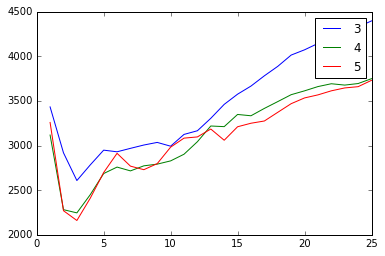

In [17]:
def knn_train_test_def(training_list, target_name, df, k):
    np.random.seed(1)
    shuffled_index=np.random.permutation(range(len(df)))
    rand_df = df.reindex(shuffled_index)
    len_test=len(rand_df)//4
    test_df=rand_df.iloc[:len_test]
    train_df=rand_df.iloc[len_test:]
    knn = KNeighborsRegressor(n_neighbors=k)
    knn.fit(train_df[training_list], train_df[target_name])
    predictions = knn.predict(test_df[training_list])
    mse=mean_squared_error(test_df[target_name], predictions)
    rmse=mse**(1/2)
    return rmse

n_features_top3=[3,4,5]
for n in n_features_top3:
    new_rmse_list_top3=[]
    training_list=ordered_features[:n]
    for k in range(1,26):
        new_rmse_top3=knn_train_test_def(training_list, "price", numeric_cars, k)
        new_rmse_list_top3.append(new_rmse_top3)
    plt.plot(range(1,26), new_rmse_list_top3, label=str(n))
    print(n, " ", new_rmse_list_top3)
plt.legend()
plt.show()

## Conclusion

I found an optimal value of k=3 for each model. The best model is the one with the best 5 features and k=3.

## Next Step

I'll Modify the knn_train_test_def() function to use k-fold cross validation instead of test/train validation.

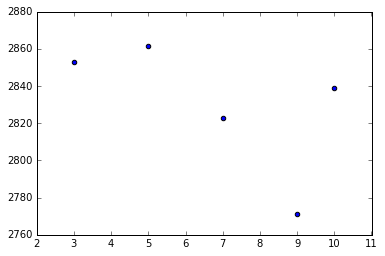

In [18]:
from sklearn.model_selection import cross_val_score, KFold

def cross_train_test(training_list, target_name, df):
    num_folds = [3, 5, 7, 9, 10]
    avg_rmse_list=[]
    for fold in num_folds:
        kf = KFold(fold, shuffle=True, random_state=1)
        model = KNeighborsRegressor(n_neighbors=3)
        mses = cross_val_score(model, df[training_list], df[target_name], scoring="neg_mean_squared_error", cv=kf)
        rmses = np.sqrt(np.absolute(mses))
        avg_rmse = np.mean(rmses)
        avg_rmse_list.append(avg_rmse)
    return num_folds, avg_rmse_list

training_list=ordered_features[:5]
num_folds, avg_rmse_list = cross_train_test(training_list, "price", numeric_cars)
plt.scatter(num_folds, avg_rmse_list)
plt.show()

The cross-validation is more effective with a 9-fold model.